In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import neighbors, datasets, metrics
from mlxtend.plotting import plot_confusion_matrix
from sklearn.neural_network import MLPClassifier

In [2]:
# carregando o dataset
df = pd.read_csv('datasets_diabetes.csv')

In [35]:
# Info do DF
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [36]:
# Quantidade de Linhas e Colunas no Dataset
df.shape

(768, 9)

In [37]:
# Media da coluna Age
df['Age'].mean()

33.240885416666664

In [3]:
# Linhas do df
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# definindo os dados de entrada e saida
entradas = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']] # dados de entrada
saida = df[['Outcome']] # dado de saida

In [39]:
# Valores da saida
saida['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [5]:
# normalização dos dados de entrada
normaliza = MinMaxScaler()
entradas_normalizadas = normaliza.fit_transform(entradas)

In [6]:
# dividindo os dados entre treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(entradas_normalizadas, saida,test_size=0.30,random_state=42)

In [40]:
# quantidade de registros para treinamento
len(x_train)

537

## Algoritmo KNN

In [8]:
# criando o objeto de classificação
clf_KNN = KNeighborsClassifier(n_neighbors=5)

# treinamento o modelo
clf_KNN.fit(x_train, y_train.values.reshape(-1,))

# realiza a previsão
y_pred = clf_KNN.predict(x_test)

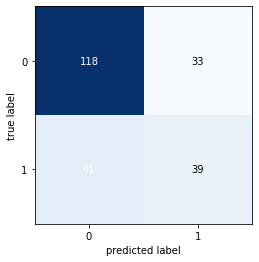

Acuracia do Modelo:  0.6796536796536796


In [20]:
# realiza o plot da Matrix de Confusão
matriz_confusao = confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat = matriz_confusao)
plt.show()

# Acuracia do modelo
print('Acuracia do Modelo: ', accuracy_score(y_test, y_pred))

## Algoritmo Arvore de Decisão

In [23]:
# criando o objeto de classificação
clf_arvore = DecisionTreeClassifier(random_state = 1)

# treinamento o modelo
clf_arvore.fit(x_train, y_train.values.reshape(-1,))

# realiza a previsão
y_pred = clf_arvore.predict(x_test)

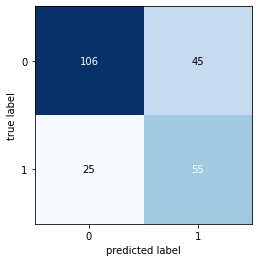

Acuracia do Modelo:  0.696969696969697


In [24]:
# realiza o plot da Matrix de Confusão
matriz_confusao = confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat = matriz_confusao)
plt.show()

# Acuracia do modelo
print('Acuracia do Modelo: ', accuracy_score(y_test, y_pred))

## Algoritmo Floresta Randômica

In [27]:
# criando o objeto de classificação
clf_floresta = RandomForestClassifier(max_depth=10, random_state=1)

# treinamento o modelo
clf_floresta.fit(x_train, y_train.values.reshape(-1,))

# realiza a previsão
y_pred = clf_floresta.predict(x_test)

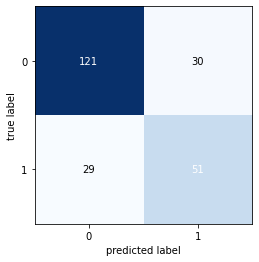

Acuracia do Modelo:  0.7445887445887446


In [28]:
# realiza o plot da Matrix de Confusão
matriz_confusao = confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat = matriz_confusao)
plt.show()

# Acuracia do modelo
print('Acuracia do Modelo: ', accuracy_score(y_test, y_pred))

## Algoritmo SVM

In [29]:
# criando o objeto de classificação
clf_svm = SVC(gamma='auto',random_state=1)

# treinamento o modelo
clf_svm.fit(x_train, y_train.values.reshape(-1,))

# realiza a previsão
y_pred = clf_svm.predict(x_test)

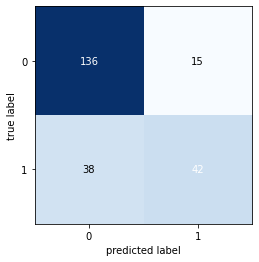

Acuracia do Modelo:  0.7705627705627706


In [30]:
# realiza o plot da Matrix de Confusão
matriz_confusao = confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat = matriz_confusao)
plt.show()

# Acuracia do modelo
print('Acuracia do Modelo: ', accuracy_score(y_test, y_pred))

## Algoritmo Rede MLP

In [33]:
# criando o objeto de classificação
clf_mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,
5), random_state=1)

# treinamento o modelo
clf_mlp.fit(x_train, y_train.values.reshape(-1,))

# realiza a previsão
y_pred = clf_mlp.predict(x_test)

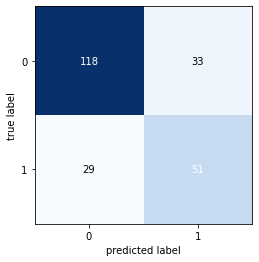

Acuracia do Modelo:  0.7316017316017316


In [34]:
# realiza o plot da Matrix de Confusão
matriz_confusao = confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat = matriz_confusao)
plt.show()

# Acuracia do modelo
print('Acuracia do Modelo: ', accuracy_score(y_test, y_pred))

## Parte do Código 1

In [1]:
import threading
import time
from random import randint

In [19]:
def funcao_1(num):
    n = num
    print('Inicio t1..')
    while n > 10:        
        n -= 1
        print(f'n_1: {n}')
        time.sleep(randint(0,2))
    print('Fim t1..')

def funcao_2(num):
    n = num
    print('Inicio t2..')
    while n < 10:
        n += 1
        print(f'n_2: {n}')
        time.sleep(randint(0,2))
    print('Fim t2..')

if __name__ == '__main__':
    t1 = threading.Thread(target = funcao_1, args = (100,))
    t2 = threading.Thread(target = funcao_2, args = (0,))

    t1.start()
    t2.start()

    t1.join()
    t2.join()

    print('\nFim...')

Inicio t1..
n_1: 99
Inicio t2..
n_2: 1
n_2: 2
n_1: 98
n_1: 97
n_2: 3
n_1: 96
n_1: 95
n_2: 4
n_2: 5n_1: 94

n_2: 6
n_1: 93
n_2: 7
n_1: 92
n_1: 91
n_2: 8
n_1: 90
n_1: 89
n_2: 9
n_1: 88
n_2: 10
n_1: 87
Fim t2..
n_1: 86
n_1: 85
n_1: 84
n_1: 83
n_1: 82
n_1: 81
n_1: 80
n_1: 79
n_1: 78
n_1: 77
n_1: 76
n_1: 75
n_1: 74
n_1: 73
n_1: 72
n_1: 71
n_1: 70
n_1: 69
n_1: 68
n_1: 67
n_1: 66
n_1: 65
n_1: 64
n_1: 63
n_1: 62
n_1: 61
n_1: 60
n_1: 59
n_1: 58
n_1: 57
n_1: 56
n_1: 55
n_1: 54
n_1: 53
n_1: 52
n_1: 51
n_1: 50
n_1: 49
n_1: 48
n_1: 47
n_1: 46
n_1: 45
n_1: 44
n_1: 43
n_1: 42
n_1: 41
n_1: 40
n_1: 39
n_1: 38
n_1: 37
n_1: 36
n_1: 35
n_1: 34
n_1: 33
n_1: 32
n_1: 31
n_1: 30
n_1: 29
n_1: 28
n_1: 27
n_1: 26
n_1: 25
n_1: 24
n_1: 23
n_1: 22
n_1: 21
n_1: 20
n_1: 19
n_1: 18
n_1: 17
n_1: 16
n_1: 15
n_1: 14
n_1: 13
n_1: 12
n_1: 11
n_1: 10
Fim t1..

Fim...
